# Assignment Dimensionality Reduction and Clustering (Unspervised Learning)

### Sheikh-Sedat Touray
### DSP 556

## **Mounting my Drive and Defining the path to Read files from in my Google Drive bold text**

In [7]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys

    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/Colab-Notebooks/"
    user_home = "/content/drive/My Drive/"

    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory i

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Importing my Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import rand_score,make_scorer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.model_selection import ParameterGrid
from sklearn.manifold import TSNE
!pip install umap-learn



Importing Umap after Installing it from the previous Cell


In [3]:
#import umap
import umap

In [31]:
#more libraries
!pip install mglearn
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons

In [4]:
#ignored some warnings that were not useful
import warnings
warnings.filterwarnings("ignore")

**Forest Cover Type Datadet**

In [8]:
# Reading the forest cover type data set as a data frame
covert = pd.read_csv(notes_home+"covtype.csv")

In [9]:
# Splitting the dataset into features and target variables
x = covert.drop(["Cover_Type"], axis=1)
y = covert["Cover_Type"]
#y = covert["Cover_Type"].astype("category")


In [143]:
#Visualize the data
covert

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [20]:
# I am choosing 10000 observations to make blobs
x,y = make_blobs(n_samples=10000, centers=4, random_state=42)
# SPlit the training and testing sets
X_traint, X_testt, y_traint, y_testt = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=3)

# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the training data and transform it
X_traint = sc.fit_transform(X_traint)

# Use the same scaler to transform the test data
X_testt = sc.transform(X_testt)

In [21]:
# Define the parameter grid
param_grid = {'n_clusters': list(range(2,7)), 'max_iter': [20, 100, 500]}

In [22]:
# Generate all combinations of parameters
para_combination = list(ParameterGrid(param_grid))

# Initialize variables to store best parameters and corresponding rand score
best_para = None
be_rand_score = -1

# Iterate through parameter combinations
for para in para_combination:
    # Create an instance of AgglomerativeClustering with current parameters
    modelk = KMeans(**para)

    # Fit the model and predict clusters
    clust = modelk.fit_predict(X_traint)

    # Calculate rand score
    rand_k = rand_score(y_traint, clust)

    # Update best parameters if current silhouette score is higher
    if rand_k > be_rand_score:
        be_rand_score = rand_k
        best_para = para

# Print the best parameters and corresponding silhouette score
print("Best Parameters:{}", best_para)
print("Best training rand Score:", be_rand_score)
%time clust

Best Parameters:{} {'max_iter': 20, 'n_clusters': 4}
Best training rand Score: 1.0
CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 7.39 µs


array([3, 0, 3, ..., 1, 1, 5], dtype=int32)

It gave the best max iteration as 20 and the number of clusters as 4 with a training timing of about 4 micro seconds. In this exercise the size of the dataset of does not matter as the training seem to happening very quickly whether we make a subset or select the entire dataset. This is because Kmeans scales quickly even on large datasets. And we have a rand score of 1 which shows almost a perfect match in our training

**GridSearch worked!!**

In [23]:
# use our best model to test on unseen data
best_modek = KMeans(max_iter = 20, n_clusters = 4)
#predict on unseen data
preddick = best_modek.fit_predict(X_testt)
#compute rand score
rand_km = rand_score(y_testt, preddick)
#print out the score
print("Rand Score of Kmeans Model: {:3.2f}".format(rand_km))

Rand Score of Kmeans Model: 1.00


Cluster memberships:
[2 1 2 ... 1 1 3]


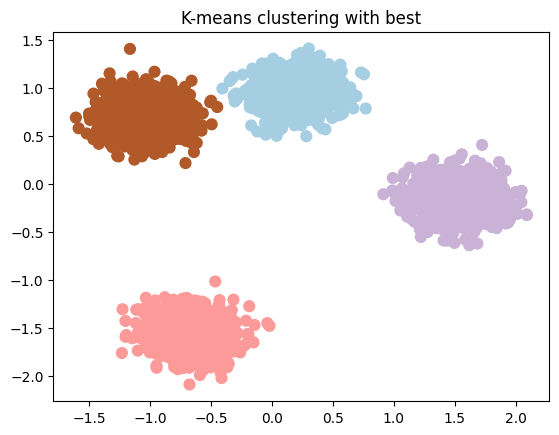

In [39]:
plt.scatter(X_testt[:, 0], X_testt[:, 1], c=preddick, s=60, cmap='Paired')
plt.scatter(best_modek.cluster_centers_[:, 0], best_modek.cluster_centers_[:, 1], s=60,
                marker='^', c=range(best_modek.n_clusters), linewidth=2, cmap='Paired')
plt.title("K-means clustering with best")

print("Cluster memberships:\n{}".format(preddick))

when I chose the number of clusters to be six it was difficult to tell the clusters apart as several clusters were joined together, although the colors seperated them but there was more overlaps. However with n-clusters = 4 shows better seperation.

**Reducing the Dimensionality of KMeans with TSNE and UMAP**


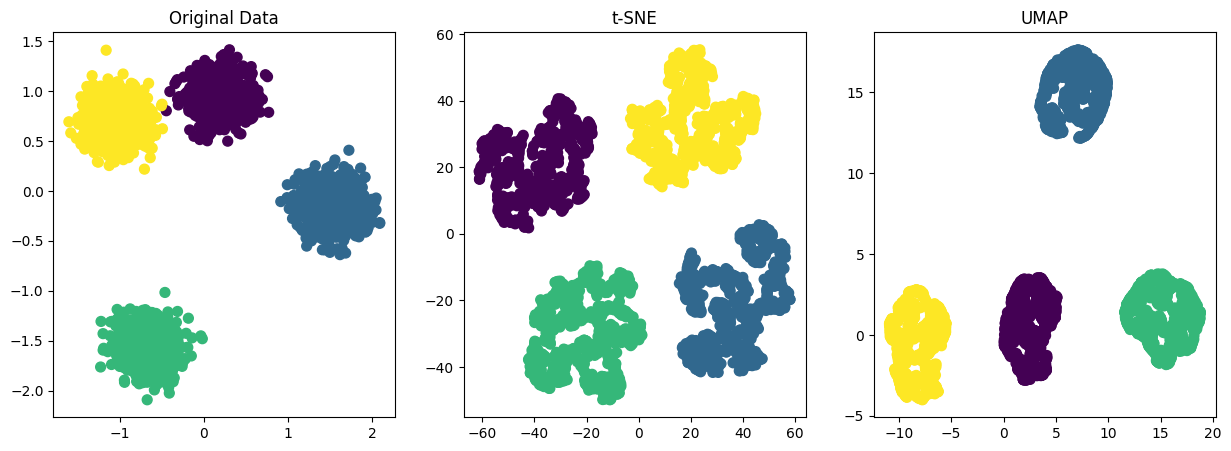

In [26]:
# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_testt)


# Reduce dimensionality with UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_testt)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X_testt[:, 0], X_testt[:, 1], c=y_testt, cmap='viridis', s=50)
axs[0].set_title('Original Data')

# Plot t-SNE results
axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=preddick, cmap='viridis', s=50)
axs[1].set_title('t-SNE')

# Plot UMAP results
axs[2].scatter(X_umap[:, 0], X_umap[:, 1], c=preddick, cmap='viridis', s=50)
axs[2].set_title('UMAP')

plt.show()

I plotted to visualize the original data and the dimension reductions with t-sne and umap and you can see that the data points in the original set are more sparse and each point is almost visible, whereas the in the t-sne and umap, they are kind of blurry but also show are more clear seperation. However it was taking a long time for this plot to be created so I had to re-sample my blobs from 50,000 samples to 10,000.  

**Agglomerative Clustering of the Cover Type Data**



In [28]:
#y1 = covert["Cover_Type"]

# I am choosing 20000 samples
x,y = make_blobs(n_samples=10000, centers=4, random_state=1)
# SPlit the training and testing sets
X_traina, X_testa, y_traina, y_testa = train_test_split(x, y, train_size=0.7, test_size=0.3)

# Initialize the scaler
sc = StandardScaler(with_mean=False, with_std=False)

# Fit the scaler on the training data and transform it
X_traina = sc.fit_transform(X_traina)

# Use the same scaler to transform the test data
X_testa = sc.transform(X_testa)

In [29]:

# Define parameter grid for tuning
param_gridag = {
    'n_clusters': [1, 5, 9, 13],
    'linkage': ['ward', 'complete', 'average', 'single']
}

 # Generate all combinations of parameters
param_combinations = list(ParameterGrid(param_gridag))

# Initialize variables to store best parameters and corresponding rand score
best_params = None
best_rand_score = -1

# Iterate through parameter combinations
for params in param_combinations:
    # Create an instance of AgglomerativeClustering with current parameters
    modela = AgglomerativeClustering(**params)

    # Fit the model and predict clusters
    clusters = modela.fit_predict(X_traina)

    # Calculate silhouette score
    rand_avg = rand_score(y_traina, clusters)

    # Update best parameters if current silhouette score is higher
    if rand_avg > best_rand_score:
        best_rand_score = rand_avg
        best_params = params

# Print the best parameters and corresponding silhouette score
print("Best Parameters:", best_params)
print("Best training rand Score:", best_rand_score)
%time clusters

Best Parameters: {'linkage': 'average', 'n_clusters': 5}
Best training rand Score: 0.9770383524176923
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


array([2, 2, 2, ..., 0, 2, 2])

The best parameters for the agglomerative clustering is nclusters = 5 and the linkage is average(average linkage merges the two clusters that have the smallest average distance between all their points.) and with a training time of 3 micro seconds

In [30]:
#define the best agglomerative clustering model
best_modela = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
#cluster unseen data
preddict = best_modela.fit_predict(X_testa)
#compute the rand score
rand_s = rand_score(y_testa, preddict)

print("Rand Score of Agglomerative Model: {:3.2f}".format(rand_s))

Rand Score of Agglomerative Model: 0.98


The rand score of the agglomerative model is also very good which is 0.98 mean the predicted and the true values are almost exactly the same.

In [34]:
import mglearn

Text(0.5, 1.0, 'Agglomerative clustering Viz')

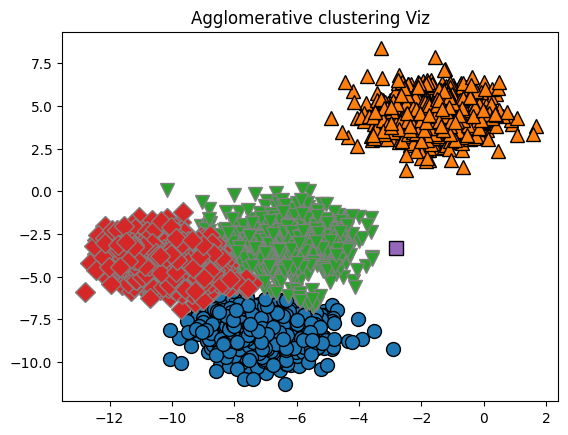

In [37]:
agg = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
assignment = agg.fit_predict(X_testa)
mglearn.discrete_scatter(X_testa[:, 0], X_testa[:, 1], assignment)
plt.title("Agglomerative clustering Viz")


The clusters probably have very dissimilar numbers of members (for example one is much bigger than all the others), as we have seen so average might work better thus it being chosen as our best parameter in the grid.

**Dimensionality Reduction of the Agglomerative model using T-SNE and UMAP**

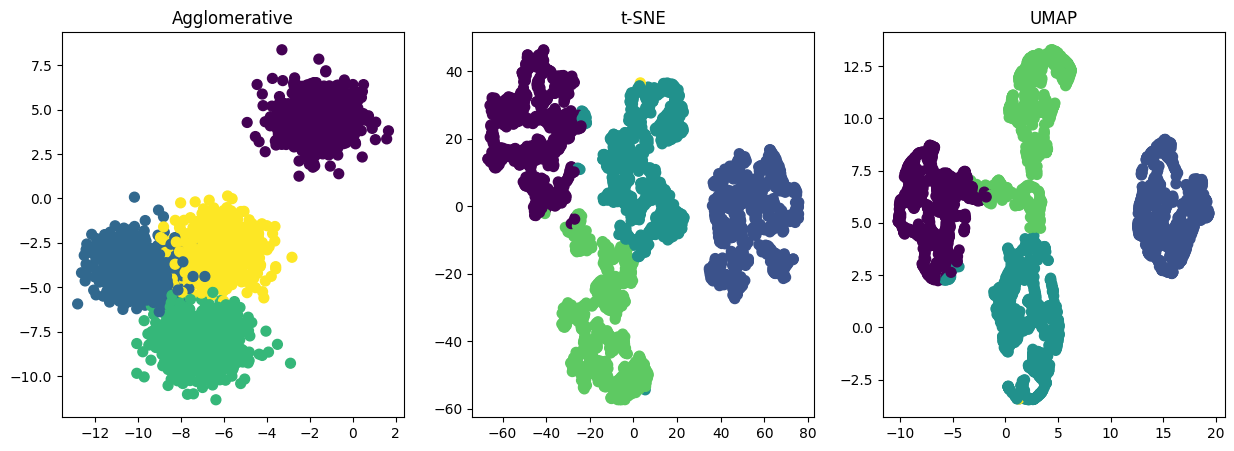

In [40]:
 # Reduce dimensionality with t-SNE
tsnea = TSNE(n_components=2, random_state=42)
X_tsnea = tsnea.fit_transform(X_testa)

# Reduce dimensionality with UMAP
umap_modela = umap.UMAP(n_components=2, random_state=42)
X_umapa = umap_modela.fit_transform(X_testa)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X_testa[:, 0], X_testa[:, 1], c=y_testa, cmap='viridis', s=50)
axs[0].set_title('Agglomerative')

# Plot t-SNE results
axs[1].scatter(X_tsnea[:, 0], X_tsnea[:, 1], c=preddict, cmap='viridis', s=50)
axs[1].set_title('t-SNE')

# Plot UMAP results
axs[2].scatter(X_umapa[:, 0], X_umapa[:, 1], c=preddict, cmap='viridis', s=50)
axs[2].set_title('UMAP')

plt.show()

UMAP and T-SNE both non-linear methods of dimensionality reduction are used to group similiar data and seperate the different ones and the agglomerative model identify the groups and project them on to space.

**DBSCAN on the Forest Cover Type Data**

In [41]:
# I am choosing 10000 observations and 25 columns
x,y = make_blobs(n_samples=20000, centers=4, random_state=42)
# SPlit the training and testing sets
X_traindb, X_testdb, y_traindb, y_testdb = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=3)

# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the training data and transform it
X_traindb = sc.fit_transform(X_traindb)

# Use the same scaler to transform the test data
X_testdb = sc.transform(X_testdb)

In [42]:
# Define parameter grid for tuning
param_gridbs = {
    'eps':[0.1,0.3,0.5,1.0],
    'algorithm':['ball_tree','kd_tree','brute']
}

 # Generate all combinations of parameters
param_combination = list(ParameterGrid(param_gridbs))

# Initialize variables to store best parameters and corresponding rand score
best_param = None
bes_rand_score = -1

# Iterate through parameter combinations
for param in param_combination:
    # Create an instance of AgglomerativeClustering with current parameters
    modelD = DBSCAN(**param)

    # Fit the model and predict clusters
    cluster = modelD.fit_predict(X_traindb)

    # Calculate rand score
    rand_av = rand_score(y_traindb, cluster)

    # Update best parameters if current silhouette score is higher
    if rand_av > bes_rand_score:
        bes_rand_score = rand_av
        best_param = param

# Print the best parameters and corresponding silhouette score
print("Best Parameters:", best_param)
print("Best training rand Score:", bes_rand_score)
%time cluster

Best Parameters: {'algorithm': 'ball_tree', 'eps': 0.3}
Best training rand Score: 0.8762883063075934
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


array([0, 0, 0, ..., 0, 0, 0])

For the the DBscan of the unsupervised learning, it did not perform as well as the previous two models as we can see that I only achieved a rand score of 0.9 and the best parameters are ball and eps=0.3.

In [56]:
#define bdscan model and manually selecting eps value just for practice
best_mode = DBSCAN(eps = 0.3, algorithm = 'ball_tree')
#predict on unseen data
preddic = best_mode.fit_predict(X_testdb)
#compute rand score
rand_sc = rand_score(y_testdb, preddic)
#print score
print("Rand Score of DBscan Model: {:3.2f}".format(rand_sc))
%time preddic

Rand Score of DBscan Model: 0.87
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


array([0, 1, 0, ..., 2, 2, 2])

When I set the eps very low I had a lot of negative numbers and it seemed like it was adding noise. So I tried to stay as close as possible to the defailt to get a better rand score and to get rid of some of the noise. Here as you can see in the testing and prediction on unseen data, I manually chose eps=0.1 which gave a perfect rand score, however, when I visualized the result, I could clearly see the error and the noises around the clusters. so I went back to my best original parameter of eps=0.3 with a rand score of 0.87

Text(0.5, 1.0, 'DBSCAN Clustering')

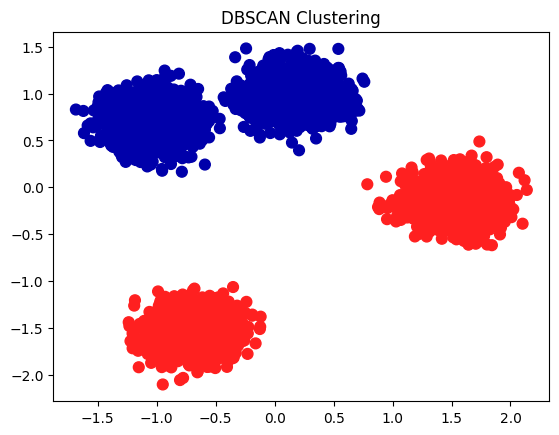

In [58]:
# plot the cluster db scan assignments
plt.scatter(X_testdb[:, 0], X_testdb[:, 1], c=preddic, cmap=mglearn.cm2, s=60)
#plot title
plt.title("DBSCAN Clustering")


We can observe the noise

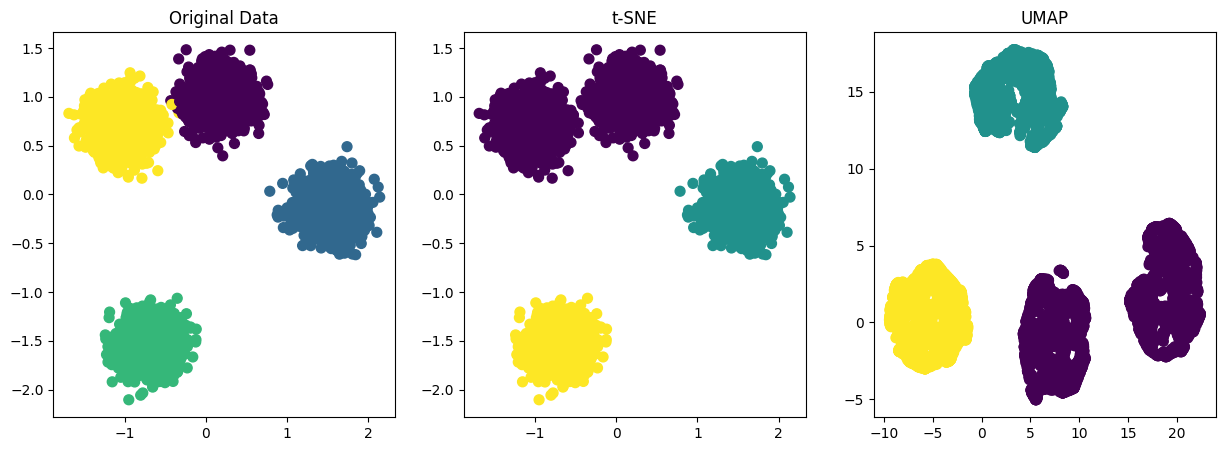

In [59]:
 # Reduce dimensionality with t-SNE
tsnes = TSNE(n_components=2, random_state=42)
X_tsnes = tsnes.fit_transform(X_testdb)

# Reduce dimensionality with UMAP
umap_models = umap.UMAP(n_components=2, random_state=42)
X_umaps = umap_models.fit_transform(X_testdb)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X_testdb[:, 0], X_testdb[:, 1], c=y_testdb, cmap='viridis', s=50)
axs[0].set_title('Original Data')

# Plot t-SNE results
axs[1].scatter(X_testdb[:, 0], X_testdb[:, 1], c=preddic, cmap='viridis', s=50)
axs[1].set_title('t-SNE')

# Plot UMAP results
axs[2].scatter(X_umaps[:, 0], X_umaps[:, 1], c=preddic, cmap='viridis', s=50)
axs[2].set_title('UMAP')

plt.show()

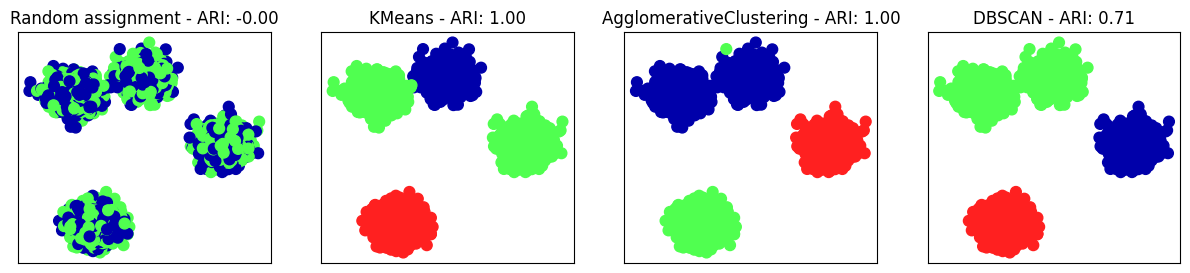

In [61]:
x,y = make_blobs(n_samples=5000, centers=4, random_state=42)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                             subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(linkage = 'average',n_clusters=5),
                  DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                    cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
            adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
# plot the cluster assignments and cluster centers
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
cmap=mglearn.cm3, s=60)
  ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                               adjusted_rand_score(y, clusters)))


As expected the random assignment gave a 0 randscore where as the kmeans and agglomerative clustering are almost perfect with the adjusted rand scores  

# NMIST Dataset Unsupervised learning

In [63]:
#loading data
data = datasets.load_digits()

In [64]:
# visualizing the description of the data
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [69]:
# Splitting the data into targets and features
feat = data.data
targ = data.target

In [65]:
# making the targets into a dataframe
mnist = pd.DataFrame(data=y,columns=['targets'])
mnist.head()

,targets
0,1
1,2
2,1
3,2
4,3


In [63]:
#visualizing the shape of the features
feat.shape

(1797, 64)

In [66]:
#visualizing the dimension of the images

data.images.shape

(1797, 8, 8)

In [70]:
#visualizing the shape of the tearget

targ.shape

(1797,)

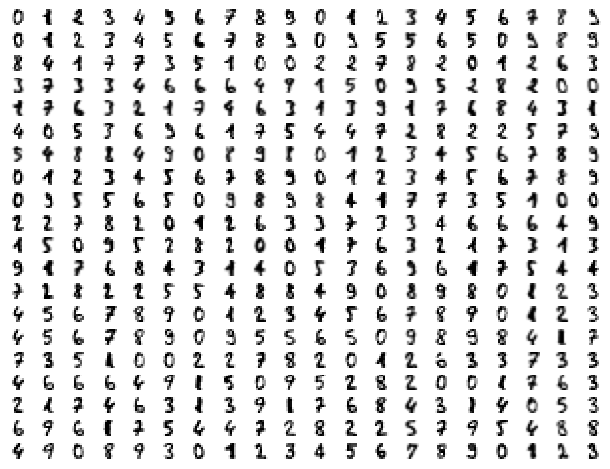

In [71]:
#making a space of 20 rows and columns for subplots of each image
fig, ax_array = plt.subplots(20, 20)
#flatten the arrays
axes = ax_array.flatten()
#make a for loop for plotting each image in the 20x20
for i, ax in enumerate(axes):
    ax.imshow(data.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

# K Means of Digit Data

In [72]:
# SPlit the training and testing sets
feat,targ = make_blobs(n_samples=1797, centers=4, random_state=42)

X_trainmt, X_testmt, y_trainmt, y_testmt = train_test_split(feat, targ, train_size=0.7, test_size=0.3, random_state=3)

# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the training data and transform it
X_trainmt = sc.fit_transform(X_trainmt)

# Use the same scaler to transform the test data
X_testmt = sc.transform(X_testmt)

In [73]:
kmeanst = KMeans(random_state=0)
# grid search
param_gridst = {'n_clusters': list(range(2,11)), 'max_iter': [20, 100, 500]}

In [74]:
 # Generate all combinations of parameters
parast_combination = list(ParameterGrid(param_gridst))

# Initialize variables to store best parameters and corresponding rand score
best_parast = None
be_rand_scorest = -1

# Iterate through parameter combinations
for parast in parast_combination:
    # Create an instance of AgglomerativeClustering with current parameters
    modelkm = KMeans(**parast)

    # Fit the model and predict clusters
    clustkm = modelkm.fit_predict(X_trainmt)

    # Calculate rand score
    rand_km = rand_score(y_trainmt, clustkm)

    # Update best parameters if current silhouette score is higher
    if rand_km > be_rand_scorest:
        be_rand_scorest = rand_km
        best_parast = parast

# Print the best parameters and corresponding silhouette score
print("Best Parameters:", best_parast)
print("Best training rand Score:", be_rand_scorest)
%time clustkm

Best Parameters: {'max_iter': 20, 'n_clusters': 4}
Best training rand Score: 1.0
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


array([2, 3, 3, ..., 7, 6, 8], dtype=int32)

In [75]:
#manually define the best model
best_modelkmst = KMeans(max_iter = 20, n_clusters = 4)
#predicting on unseen data
preddickmst = best_modelkmst.fit_predict(X_testmt)
#computing rand score
rand_kmst = rand_score(y_testmt, preddickmst)
#printing rand score
print("Rand Score of Kmeans Model: {:3.2f}".format(rand_kmst))

Rand Score of Kmeans Model: 1.00


The Kmeans has given a perfect rand score which means that the similarities or the differences between the test cases and the predicted are a perfect match.





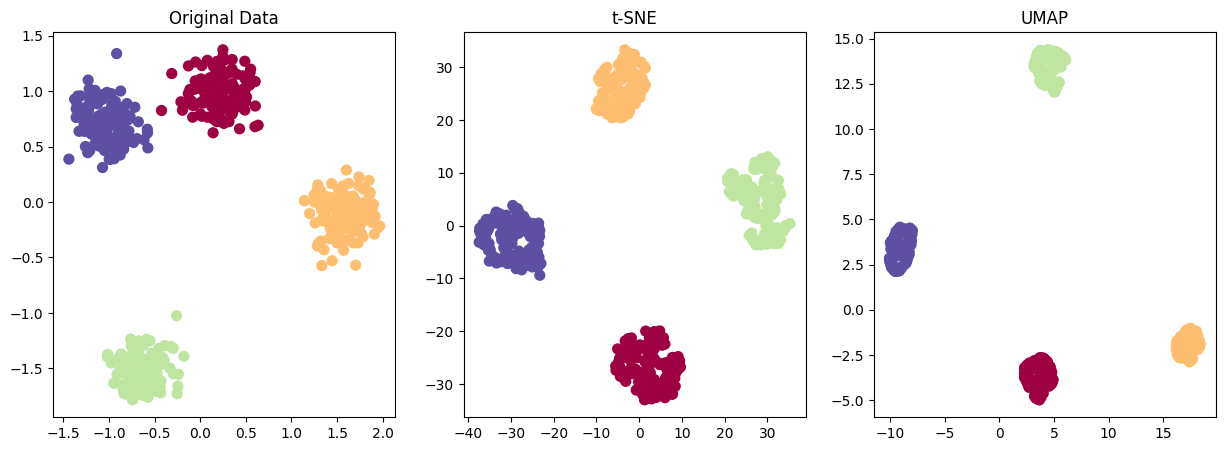

In [79]:
# Reduce dimensionality with t-SNE
tsnesmt = TSNE(n_components=2, random_state=42)
X_tsnesmt = tsnesmt.fit_transform(X_testmt)

# Reduce dimensionality with UMAP
umap_modelsmt = umap.UMAP(n_components=2,n_neighbors=30,min_dist=0.0,
random_state=42)
X_umapsmt = umap_modelsmt.fit_transform(X_testmt)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X_testmt[:, 0], X_testmt[:, 1], c=y_testmt, cmap='Spectral', s=50)
axs[0].set_title('Original Data')

# Plot t-SNE results
axs[1].scatter(X_tsnesmt[:, 0], X_tsnesmt[:, 1], c=preddickmst, cmap='Spectral', s=50)
axs[1].set_title('t-SNE')

# Plot UMAP results
axs[2].scatter(X_umapsmt[:, 0], X_umapsmt[:, 1], c=preddickmst, cmap='Spectral', s=50)
axs[2].set_title('UMAP')

plt.show()

it is beneficial to set n_neighbors for umap high and min_dist to a very low value. Since we actually want to pack points together densely.So a low m-dist value will help, as well as making cleaner separations between clusters. In this case we will simply set min_dist to be 0.

# Agglomerative Clustering of the Digits Data

In [81]:
# I am choosing 10000 observations and 25 columns
#feat,targ = make_blobs(n_samples=1000, centers=4, random_state=42)
#Ignore comments above as I will be choosing entire dataset
# SPlit the training and testing sets
X_traindbn, X_testdbn, y_traindbn, y_testdbn = train_test_split(feat,targ, train_size=0.7, test_size=0.3, random_state=3)

# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the training data and transform it
X_traindbn = sc.fit_transform(X_traindbn)

# Use the same scaler to transform the test data
X_testdbn = sc.transform(X_testdbn)


In [82]:

# parameter grid
param_gridaggm = {'n_clusters':[2,4,8,12], 'linkage':['single','average','ward']}

In [83]:
 # Generate all combinations of parameters
parastag_combination = list(ParameterGrid(param_gridaggm))

# Initialize variables to store best parameters and corresponding rand score
best_parastag = None
be_rand_scorestag = -1

# Iterate through parameter combinations
for parastag in parastag_combination:
    # Create an instance of AgglomerativeClustering with current parameters
    modelaggm = AgglomerativeClustering(**parastag)

    # Fit the model and predict clusters
    clustaggm = modelaggm.fit_predict(X_traindbn)

    # Calculate rand score
    rand_agg = rand_score(y_traindbn, clustaggm)

    # Update best parameters if current silhouette score is higher
    if rand_agg > be_rand_scorestag:
        be_rand_scorestag = rand_agg
        best_parastag = parastag

# Print the best parameters and corresponding silhouette score
print("Best Parameters:", best_parastag)
print("Best training rand Score:", be_rand_scorestag)
%time clustaggm

Best Parameters: {'linkage': 'single', 'n_clusters': 4}
Best training rand Score: 1.0
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


array([5, 8, 0, ..., 1, 2, 9])

my best parameters here are single linkage and nclusters of 4 to get perfect matches in training with a timing if about 4 micro secs

In [84]:
# accuracy of best model
best_modelaggm = AgglomerativeClustering(n_clusters = 4,linkage = 'average' )
#Use our best model to predict on unseen data
predictam_y = best_modelaggm.fit_predict(X_testdbn)
#Compute the accuracy score and Print it out
randam = rand_score(y_testdbn, predictam_y)
print("RandScore of Agglomerative Model: {:3.2f}".format(randam))

RandScore of Agglomerative Model: 1.00


The Agglomerative clustering also has given a perfect rand score which means that the similarities or the differences between the test cases and the predicted are a perfect match.

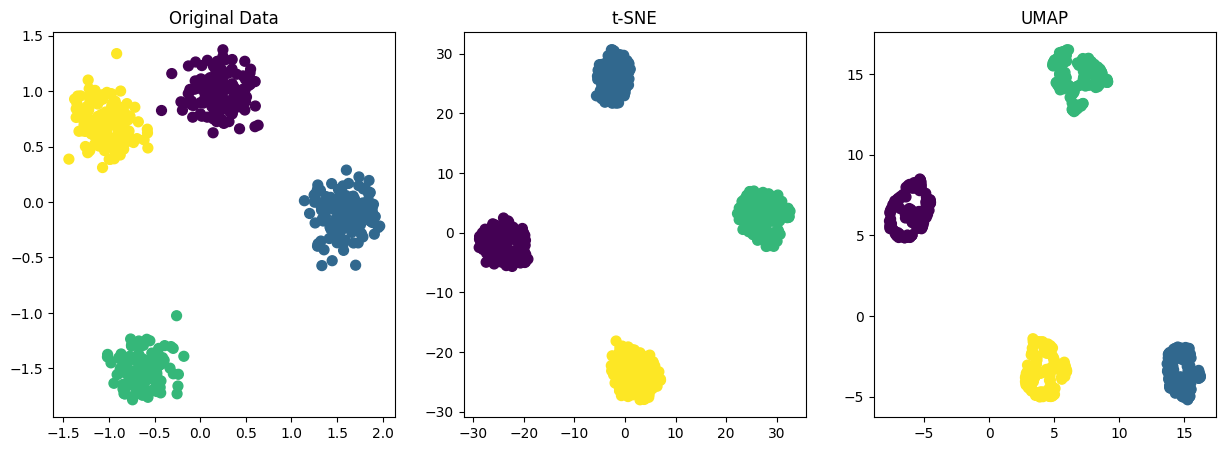

In [86]:
# Reduce dimensionality with t-SNE
tsnesmtag = TSNE(n_components=2, perplexity=50.0, learning_rate=100, random_state=42)
X_tsnesmtag = tsnesmtag.fit_transform(X_testdbn)

# Reduce dimensionality with UMAP
umap_modelsmtag = umap.UMAP(n_components=2, random_state=42)
X_umapsmtag = umap_modelsmtag.fit_transform(X_testdbn)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X_testdbn[:, 0], X_testdbn[:, 1], c=y_testdbn, cmap='viridis', s=50)
axs[0].set_title('Original Data')

# Plot t-SNE results
axs[1].scatter(X_tsnesmtag[:, 0], X_tsnesmtag[:, 1], c=predictam_y, cmap='viridis', s=50)
axs[1].set_title('t-SNE')

# Plot UMAP results
axs[2].scatter(X_umapsmtag[:, 0], X_umapsmtag[:, 1], c=predictam_y, cmap='viridis', s=50)
axs[2].set_title('UMAP')

plt.show()

In this problem instead of tuning the UMAP, I decided to do some fine-tuning with the t-sne hyperparameters for example the perplextiy and the learning rate. With the learning rate it ranges from 10 to 1000 and at first I chose auto and later changed it to 100 without much difference. The perplexity on the other hand is related to the number of nearest neighbors that is used in other manifold learning algorithms and it must be less that the number of samples because it balances the attention the t-SNE gives to local and global aspects data.

# DBSCAN of the Digits Data

In [87]:
# I am choosing 10000 observations and 25 columns
feat,targ = make_blobs(n_samples=1797, centers=4, random_state=42)
# SPlit the training and testing sets
X_traindbm, X_testdbm, y_traindbm, y_testdbm = train_test_split(feat,targ, train_size=0.7, test_size=0.3, random_state=3)

# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the training data and transform it
X_traindb = sc.fit_transform(X_traindbm)

# Use the same scaler to transform the test data
X_testdb = sc.transform(X_testdbm)

In [88]:
scanmn = DBSCAN()
# grid search
param_gridbsmn = {'eps':[0.1,0.3,0.5,0.7,0.9], 'algorithm':['ball_tree','kd_tree','brute','auto'],}

In [89]:
 # Generate all combinations of parameters
parastdm_combination = list(ParameterGrid(param_gridbsmn))

# Initialize variables to store best parameters and corresponding rand score
best_parastdm = None
be_rand_scorestdm = -1

# Iterate through parameter combinations
for parastdm in parastdm_combination:
    # Create an instance of AgglomerativeClustering with current parameters
    modeldm = DBSCAN(**parastdm)

    # Fit the model and predict clusters
    clustdm = modeldm.fit_predict(X_traindbm)

    # Calculate rand score
    rand_dm = rand_score(y_traindbm, clustdm)

    # Update best parameters if current silhouette score is higher
    if rand_dm > be_rand_scorestdm:
        be_rand_scorestdm = rand_dm
        best_parastdm = parastdm

# Print the best parameters and corresponding silhouette score
print("Best Parameters:", best_parastdm)
print("Best training rand Score:", be_rand_scorestdm)
%time clustdm

Best Parameters: {'algorithm': 'ball_tree', 'eps': 0.9}
Best training rand Score: 0.9963833107844479
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


array([0, 1, 1, ..., 2, 3, 0])

For the Dbscan of the digits data, the ball tree method and the eps of 0.9 are the best parameters. However, in both of these problems and different datasets the scan method seemed to be the noisiest. However in this problem we had an almost perfect rand score.

In [90]:
# accuracy of best model
best_modelbsmn = DBSCAN(algorithm = 'ball_tree', eps = 0.9 )
#Use our best model to test on unseen data
predictbsmn_y = best_modelbsmn.fit_predict(X_testdbm)
#Compute the rand score and Print it out
randbsm = rand_score(y_testdbm, predictbsmn_y)
print("RandScore of DBSCAN Model: {:3.2f}".format(randbsm))

RandScore of DBSCAN Model: 0.99


The test score and the training score are pretty identical so we can temporary conclude it is generalizing well but the interpretability is low since it is a form of a black box and I can really see how it is arriving at such result.

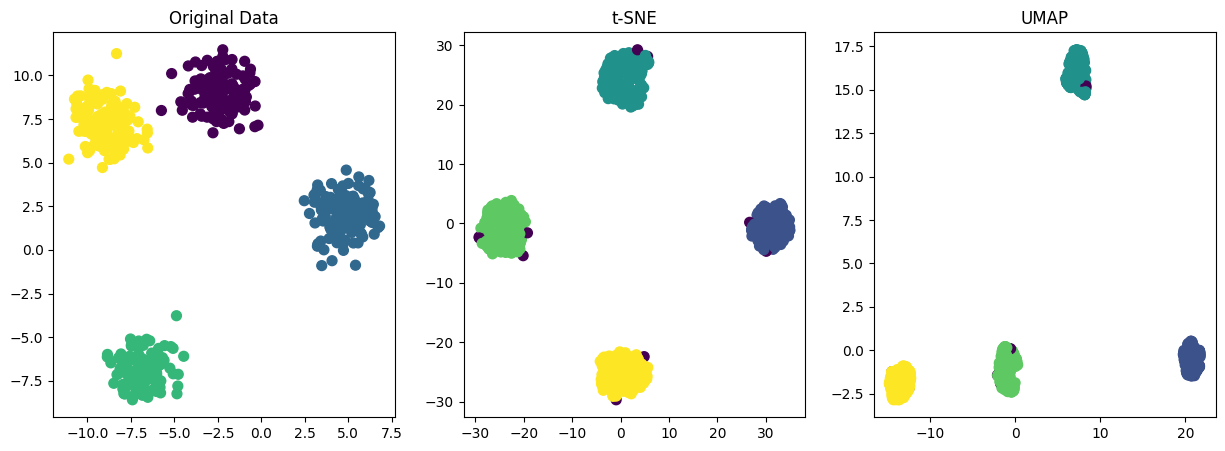

In [91]:
# Reduce dimensionality with t-SNE
tsnesmtd = TSNE(n_components=2, perplexity=50.0, learning_rate=100,random_state=42)
X_tsnesmtb = tsnesmtd.fit_transform(X_testdbm)

# Reduce dimensionality with UMAP
umap_modelsmtb = umap.UMAP(n_components=2, n_neighbors=30,min_dist=0.0,random_state=42)
X_umapsmtb = umap_modelsmtb.fit_transform(X_testdbm)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original data
axs[0].scatter(X_testdbm[:, 0], X_testdbm[:, 1], c=y_testdbm, cmap='viridis', s=50)
axs[0].set_title('Original Data')

# Plot t-SNE results
axs[1].scatter(X_tsnesmtb[:, 0], X_tsnesmtb[:, 1], c=predictbsmn_y, cmap='viridis', s=50)
axs[1].set_title('t-SNE')

# Plot UMAP results
axs[2].scatter(X_umapsmtb[:, 0], X_umapsmtb[:, 1], c=predictbsmn_y, cmap='viridis', s=50)
axs[2].set_title('UMAP')

plt.show()



From these plots we can see a little bit of noise on umap, however, it is even t-SNE. However the distances between the clusters are decent and the vizualitions corroborate the  results.

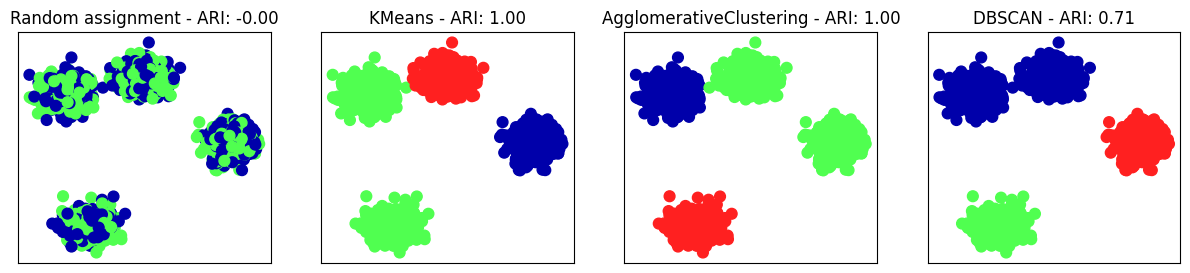

In [95]:
feat,targ = make_blobs(n_samples=1797, centers=4, random_state=42)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(feat)
X_scaled = scaler.transform(feat)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                             subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=4),
                  DBSCAN(algorithm = 'ball_tree')]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(feat))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                    cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
            adjusted_rand_score(targ, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
# plot the cluster assignments and cluster centers
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
cmap=mglearn.cm3, s=60)
  ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                               adjusted_rand_score(targ, clusters)))


There must be some leakages in the DBscan because when I tried to tune the parameters the adjusted rand score dropped significantly.

# Differencences Between the Clustering algorithms



# Algorithmic Approach:
* K-means: It is a centroid-based algorithm. It partitions the data into k clusters by assigning each data point to the cluster whose centroid is closest to it.
* Agglomerative Clustering: It is a hierarchical clustering algorithm that starts with individual data points as separate clusters and then merges them iteratively based on a linkage criterion (e.g., distance or similarity).
* DBSCAN: It is a density-based algorithm that defines clusters as dense regions separated by areas of lower point density. It doesn't require specifying the number of clusters in advance.


# Number of Clusters:
* K-means: Requires the number of clusters (k) to be specified in advance. It may not perform well if the true number of clusters is not known or if the clusters have different shapes or sizes.
* Agglomerative Clustering: The number of clusters is not pre-specified, and the algorithm generates a hierarchy of clusters that can be cut at different levels to obtain the desired number of clusters.
* DBSCAN: Does not require specifying the number of clusters in advance. It automatically identifies the number of clusters based on data density.

# Cluster Shape:
* K-means: Assumes that clusters are spherical and equally sized, which can lead to poor performance on elongated or irregularly shaped clusters.
* Agglomerative Clustering: Can handle clusters of different shapes and sizes because it forms a hierarchy of clusters.
* DBSCAN: Can identify clusters of arbitrary shapes and sizes. It is robust to outliers and can find clusters with varying densities.


# Handling Outliers:
K-means: Sensitive to outliers, as they can significantly impact the centroid positions.
Agglomerative Clustering: Can handle outliers to some extent, especially if a linkage criterion that is less sensitive to outliers is used.
DBSCAN: Robust to outliers because it identifies clusters based on density and treats sparse regions as noise.




# Differences between t-SNE and UMAP

**UMAP** is often preferred for its computational efficiency and the ability to balance local and global structure preservation and it is generally more computationally efficient and can scale better to larger datasets. UMAP has a better time complexity (close to linear) compared to t-SNE. However, **t-SNE** , on the other hand tends to focus on preserving the local structure of the data. It is effective at capturing clusters and maintaining the distances between nearby points in the high-dimensional space.It can also be computationally expensive, especially for large datasets. The algorithm has a time complexity of O(N^2) where N is the number of data points. Also it is less stable than UMAP